<a href="https://colab.research.google.com/github/Junoflows/DeepLearning_From_Scratch1/blob/main/chapter_4_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 신경망 학습

+ 학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
+ 손실 함수와 경사법에 대해 알아보자.

## 4.1 데이터에서 학습한다!

+ 퍼셉트론에서는 진리표를 보며 사람이 수작업으로 매개변수 값을 설정했다.
+ 층을 깊게 한 딥러닝의 경우 매개변수를 수작업으로 하는 것은 불가능하다.
+ 신경망에 데이터를 보고 가중치 매개변수의 값을 자동으로 결장한다.

### 4.1.1 데이터 주도 학습

+ 기계학습이란 데이터에서 답을 찾고 패턴을 발견하고 이야기를 만드는 것이다.
+ 즉 기계학습의 중심에는 데이터가 존재한다.
+ 기계학습은 사람의 개입을 최소화하고 수집한 데이터로 패턴을 찾는 시도를 한다.

<img src='http://drive.google.com/uc?export=view&id=1LMcf7NiBBSMw_PAvATYYSxmtil7zTQQj' width = 400/><br>

+ 위 손글씨 이미지를 보고 5인지 아닌지 알아보는 프로그램을 구현하는 것이 목표이다.
+ 사람마다 다르게 쓰이기 때문에 5를 특징짓는 규칙을 찾기 쉽지 않다.
+ 따라서 5를 인식하는 알고리즘을 처음부터 설계하는 대신,  
이미지에서 특징을 추출하고, 그 특징의 패턴을 기계학습 기술로 학습한다.
+ 이미지 데이터를 벡터로 변환하고 지도 학습 방식의 대표 분류 기법인 SVM, KNN 등으로 학습할 수 있다.
+ 모아진 데이터로부터 규칙을 찾아내는 역할을 '기계'가 담당한다.
+ 다만, 이미지를 벡터로 변환할 때 사용하는 특징은 여전히 사람이 설계한다.

+ 신경망과 딥러닝은 기존 기계학습에서의 방법보다 사람의 개입을 더욱 배제할 수 있게 해준다.

<img src='http://drive.google.com/uc?export=view&id=11YD_PEQ-HymZ-VZifEVsQ8SgTuWyUrts' height = 300/><br>

+ 기계학습 방식은 위 그림의 중간과 같고,  
신경망(딥러닝) 방식은 위 그림의 맨 아래처럼 사람이 개입하지 않는 블록 하나로 그려진다.
+ 위 그림에서 알 수 있듯 기계학습 방식에는 특징을 사람이 설계했지만,  
신경망은 이미지에 포함된 중요한 특징도 기계가 스스로 학습한다.

+ 신경망의 이점은 모든 문제를 같은 맥락에서 풀 수 있다는 점에 있다.
+ 숫자 뿐만 아니라 동물, 사람을 인식하는 문제 등 세부사항과 관계없이  
주어진 데이터를 학습하고 패턴을 발견하려 시도한다.
+ 신경망은 모든 문제를 주어진 데이터 그대로 입력 데이터로 활용해 end-to-end으로 학습할 수 있다.

### 4.1.2 훈련 데이터와 시험 데이터

+ 기계학습 문제는 훈련 데이터와 시험 데이터로 나눠 학습과 실험을 수행하는 것이 일반적이다.
+ 시험 데이터를 사용하여 훈련한 모델의 실력을 평가한다.
+ 데이터셋 하나로만 매개변수의 학습과 평가를 수행하면 과적합의 문제가 발생할 수 있다.
+ 과적합의 문제를 피하는 것도 기계학습의 중요한 과제이다.

## 4.2 손실 함수

+ 신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현하고.  
그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색한다.
+ 신경망 학습에서 사용하는 지표는 __손실 함수__ 라고 한다.
+ 손실 함수는 일반적으로 오차제곱합과 교차 엔트로피 오차를 사용한다.

__NOTE__  
손실 함수는 신경망 성능의 나쁨을 나타내는 지표로,  
현재 신경망이 훈련 데이터를 얼마나 잘 처리하지 못하느냐를 나타낸다.

### 4.2.1 오차제곱합

+ 가장 많이 쓰이는 손실 함수는 오차제곱합이다. 수식은 아래와 같다.

$  E = \frac{1}{2}\sum_{k} (y_k - t_k)^2 $

+ $y_k $는 싱경망의 출력(신경망이 추정한 값), $t_k$는 정답 레이블, $k$는 데이터의 차원 수를 나타낸다.

In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

+ 이 배열들의 원소는 첫 번째 인덱스부터 순서대로 숫자 0,1,2 ... 일 때의 값이다.
+ 신경망의 출력 y 는 소프트맥스 함수의 출력이다.
+ 이 예에서 이미지가 0일 확률은 0.1, 1일 확률은 0.05로 해석된다.
+ 정답 레이블인 t는 정답인 원소는 1로, 아닌 것은 0으로 표기한다.
+ 여기서 원소가 1인 값의 인덱스는 2이므로 정답이 2임을 알 수 있다.
+ 이처럼 한 원소만 1로 하고 나머지는 0으로 나타내는 표기법을 __원-핫 인코딩__ 이라고 한다.


+ 앞서 언급한 오차제곱합을 파이썬으로 구현해보자.

In [ ]:
import numpy as np

def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

+ 이 함수를 실제로 사용해보자.

In [ ]:
# 정답은 '2'
t = [0,0,1,0,0,0,0,0,0,0]

# 예1 : '2'일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [ ]:
# 예2 : '7'일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

+ 첫 번째 예는 젇답이 2 이고 신경망의 출력도 2 에서 가장 높은 경우다.
+ 두 번째 예는 정답은 2 지만 신경망의 출력은 7에서 가장 높다.
+ 첫 번째 예의 손실 함수 출력이 작으며 정답 레이블과 오차도 작은 것을 알 수 있다.
+ 즉 오차제곱합 기준으로 첫 번째 추정 결과가 정답에 더 가까울 것으로 판단할 수 있다.

### 4.2.2 교차 엔트로피 오차

+ 또 다른 손실 함수로서 교차 엔트로피 오차도 자주 사용한다. 수식은 다음과 같다.

$  E = -\sum_{k} t_k log (y_k) $

+ 여기에서 log 는 밑이 e인 자연로그이다.
+ $y_k$는 신경망의 출력, $t_k$는 정답 레이블이다.
+ $t_k$는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0이다. (원-핫 인코딩)
+ 실질적으로 정답일 때의 추정의 자연로그를 계산하는 식이다.

예를 들어 정답 레이블은 2가 정답이라 하고 신경망 출력이 0.6이라면 교차 엔트로프 오차는 -log0.6 = 0.51이 된다.  
같은 조건에서 신경망 출력이 0.1 이라면 -log0.1 = 2.30 이다.  
즉 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다.

<img src='http://drive.google.com/uc?export=view&id=1EwbqMzq5y-4CmVNYeZo86LB3Zd_ItUtH' height = 300 /><br>

+ x가 1일 때 y는 0이 되고 x가 0에 가까워질수록 y의 값은 점점 작아진다.
+ 정답일 때의 출력이 커질수록 0에 다가가다가 1일 때 0이 된다. 반대로 정답일 때의 출력이 작아질수록 오차는 커진다.
+ 교차 엔트로피 오차를 구현해보자.

In [ ]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

+ y, t는 넘파이 배열이다.
+ np.log계산에서 아주 작은 delta를 더하는 이유는 np.log()에 0을 입력하면 -inf가 되기 때문에 이를 방지하기 위함이다.
+ 위 함수를 써서 간단한 계산을 해보자.

In [ ]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [ ]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

+ 첫 번째 예는 정답일 때 출력이 0.6인 경우고 이 때 교차 엔트로피 오차는 약 0.51dlek
+ 두 번쩨 예는 정답일 때 출력이 0.1인 경우고, 이때의 교차 엔트로피 오차는 2.3이다.
+ 오차 값이 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단한 것으로 오차제곱합 판단과 일치한다.

### 4.2.3 미니배치 학습

+ 기계학습 문제는 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아낸다.
+ 이렇게 하려면 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 한다.
+ 모든 훈련 데이터를 대상으로 한 교차 엔트로피 오차 수식은 다음과 같다.

$  E = -\frac{1}{N} \sum_{n} \sum_{k} t_{nk} log (y_{nk}) $

+ 데이터가 N개라면 $t_{nk}$는 n번째 데이터의 k번째 값을 의미한다. ($y_{nk}$ 는 신경망의 출력 $t_{nk}$는 정답 레이블)
+ 손실 함수를 N개의 데이터로 확장하고, 마지막에 N으로 나누어 정규화한다.
+ 이렇게 '평균 손실 함수'를 구해 사용하면 훈련 데이터 개수와 관계없이 언제든 통일된 지표를 얻을 수 있다.

+ 그런데 MNIST 데이터셋은 훈련 데이터가 60,000개 이므로  
모든 데이터를 대상으로 손실 함수의 합을 구하려면 시간이 오래 걸린다.
+ 더 나아가 빅데이터에서는 수백만 ~ 수천만이 넘는 데이터를 대상으로 손실 함수를 계산하는 것은 현실적이지 않다.
+ 이런 경우 데이터 일부를 추려 전체의 '근사치'로 이용할 수 있다.
+ 이 일부를 미니 배치라고 한다. 예를 들어 60,000 훈련 데이터 중에서 100장만 무작위로 뽑아서 학습하는 것이다.
+ 이런 학습 방법을 미니배치 학습이라고 한다.

+ 미니배치 학습을 구현하는 코드를 작성해보자.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys, os

sys.path.append('/content/drive/MyDrive/deep-learning-from-scratch-master/')
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
  load_mnist(normalize = True, one_hot_label= True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


+ load_mnist 함수로 MNIST 데이터셋 훈련 데이터와 시험 데이터를 읽는다.
+ 호출할 때 one_hot_label= True 로 지정하여 원-핫 인코딩으로 한다.
+ 데이터를 읽은 결과 훈련 데이터는 60,000개, 입력 데이터는 784열(원래는 28×28)인 데이터임을 알 수 있다.
+ 정답 레이블은 10줄짜리 데이터이다.  
따라서 x_train, t_train의 모습은 각각 (60000, 784), (60000,10)이 된다.
+ 이 훈련 데이터에서 무작위로 10장만 빼내기 위해서는 np.random.choice() 함수를 쓰면 된다.

In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

+ np.random.choice() 는 지정한 범위의 수 중 무작위로 원하는 개수만 꺼낼 수 있다.
+ 다음 예시를 살펴보자.

In [ ]:
# 60000 미만의 수 중에서 무작위로 10개를 골라낸다.
np.random.choice(60000,10)

array([58849, 59586, 16852, 47152, 44205, 36922,  6828, 13444, 35887,
       58139])

+ 무작위로 선택한 이 인덱스를 사용해 미니배치를 뽑아내면 된다. 손실 함수도 미니배치로 계산한다.

__NOTE__  
미니배치의 손실 함수는 일부 표본 데이터로 전체를 비슷하게 계측한다.  
전체 훈련 데이터의 대표로서 무작위로 선택한 미니배치를 사용하는 것이다.

### 4.2.4 (배치용) 교차 엔트로피 오차 구하기

+ 배치 데이터를 지원하는 교차 엔트로피 오차를 구현해보자.  
앞서 구현한 교차 엔트로피 오차를 조금만 바꿔주면 된다.

In [ ]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

+ y는 신경망의 출력, t는 정답 레이블이다.
+ y가 1차원, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape 함수로 데이터 형상을 바꿔준다.
+ 그리고 배치 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산한다.

+ 정답 레이블이 원-핫 인코딩이 아니라 2나 7 등의 숫자 레이블로 주어졌을 때의 교차 엔트로피 오차 구현은 다음과 같다.

In [ ]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size),t] + 1e-7)) / batch_size

+ 원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이고 그 계산은 무시해도 된다는 것이 핵심이다.
+ 즉 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있다.
+ 원-핫 인코딩 시 t * np.log(y) 인 부븐을 레이블 표현일 때는 np.log(y[np.arange(batch_size),t])로 구현한다.

+ np.arange(batch_size)는 0부터 batch_size - 1 까지 배열을 생성한다.
+ batch_size가 5이면 np.arange(batch_size)는 [0,1,2,3,4] 넘파이 배열을 생성한다.
+ t에는 [2,7,0,9,4]와 같이 저장되어 있으므로  
y[np.arange(batch_size),t]는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출한다.  
(이 예에서는 [y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]]인 넘파이 배열을 생선한다.)

### 4.2.5 왜 손실 함수를 설정하는가?

+ 숫자 인식의 궁극적인 목적은 높은 '정확도'를 끌어내는 매개변수 값을 찾는 것이다.
+ '정확도'라는 지표 대신 '손실 함수의 값' 을 택하는 이유는 무엇일까?
+ 이 의문은 신경망 학습에서의 '미분'의 역할에 주목하면 해결된다.
+ 신경망 학습에서 최적의 매개변수를 탐색할 때 손실 함수의 값을 가능한 작게하는 매개변수 값을 찾는다.
+ 이때 매개변수의 미분을 계산하고, 그 값을 단서로 매개변수의 값을 갱신하는 과정을 반복한다.
+ 정확도를 지표로 삼으면 안되는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 떄문이다.
+ 구체적인 예를 살펴보자.

한 신경망이 100장의 훈련 데이터 중 32장을 올바로 인식한다고 하자.

+ 이 경우 정확도는 32%이다. 만약 정확도가 지표라면 가중치 매개변수 값을 조금 바꿔도 정확도는 32%로 유지된다.
+ 즉 매개변수를 약간만 조정해서는 정확도가 개선되지 않고 일정하게 유지된다.
+ 반면 손실 함수를 지표로 삼는다고 가정하자.
+ 손실 함수의 값은 0.92543.. 같은 수치로 나타난다.
+ 매개변수 값이 조금 변하면 그에 반응하여 손실 함수의 값도 0.93432.. 처럼 연속적으로 변화한다.

+ 정확도는 매개변수의 미세한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 값이 불연속적으로 갑자기 변화한다.
+ 이는 '계단 함수'를 활성화 함수로 사용하지 않는 이유와 비슷하다.

<img src='http://drive.google.com/uc?export=view&id=1I3-Iz_kb-HrInZ45q2BaXpittGtBRk_w' width = 600 /><br>

+ 계단 함수의 미분은 0 을 제외하곤 0이다. 즉 계단 함수를 이용하면 손실 함수를 지표로 삼는 게 의미가 없게 된다.
+ 시그모이드 함수의 미분은 어느 장소라도 0이 되지 않는다.
+ 이는 신경망 학습에서 중요한 성질로, 기울기가 0이 되지 않는 덕분에 신경망이 올바르게 학습할 수 있다.

## 4.3 수치 미분

+ 경사법에서는 기울기 값을 기준으로 나아갈 방향을 정한다.

### 4.3.1 미분

+ 미분에 대한 자세한 설명은 생략한다.
+ 미분은 순간변화량을 표시한 것으로 수식은 다음과 같다.

$\Large{} \frac{df(x)}{dx} =
\lim_{h \to \infty} \frac{f(x+h)- f(x)}{h}
$

+ 위 식을 파이썬으로 구현해보자.

In [ ]:
# 나쁜 구현 예
def numerical_diff(f, x):
  h = 1e-50
  return (f(x + h) - f(x)) / h

+ 이 함수의 이름은 수치 미분에서 따왔다.
+ 위 구현은 문제가 없어 보이지만 2가지 개선할 점이 있다.

반올림 오차 문제

+ h에 작은 값을 대입하기 위해 1e-50을 사용했는데 이 방식은 반올림 오차 문제를 일으킨다.

In [ ]:
np.float32(1e-50)

0.0

+ 너무 작은 값을 사용하면 컴퓨터로 계산하는데 문제가 된다. 따라서 h를 $ 10^{-4} $ 값을 사용한다.

f의 차분

+ 앞선 구현에서 x+h와 x 사이의 함수 f의 차분을 계산하고 있지만 이 계산에는 오차가 존재한다.
+ 미분은 x 위치의 접선의 기울기에 해당하지만 위 구현에서는 x+h 와 x 사이의 기울기에 해당한다.
+ 이 차이는 h를 무한히 0으로 좁히는 것이 불가능해 생기는 한계이다.

<img src='http://drive.google.com/uc?export=view&id=19FM6480tn6f39klt4gcYDa3oDKNh2h0F' height = 300 /><br>

+ 이와 같이 수치 미분에는 오차가 포함되는데 이를 줄이기 위해 f의 차분을 계산하는 방법을 쓴다.
+ 이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 __중심(중앙) 차분__ 이라 한다.

+ 두 개선점을 적용해 수치 미분을 다시 구현해보자.

In [ ]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x + h) - f(x-h)) / (2*h)

### 4.3.2 수치 미분의 예

+ 수치 미분을 사용하여 간단한 함수를 미분해보자.

$ y = 0.01x^{2} + 0.1x
$

In [ ]:
def function_1(x):
  return 0.01 * x **2 + 0.1 * x

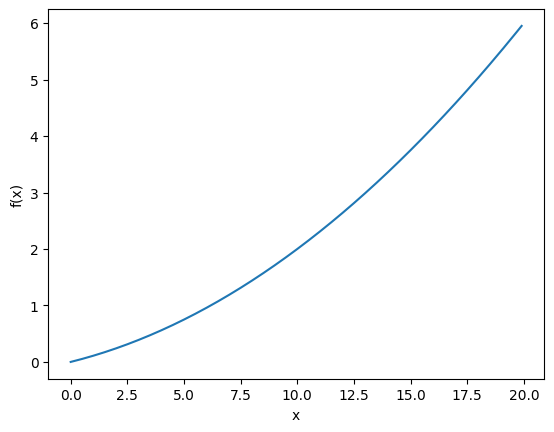

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1) # 0~20까지 0.1 간격의 배열 x를 만든다(20은 미포함).
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

+ x = 5 일 때와 x = 10 일 때 이 함수의 미분을 계산해보자.

In [ ]:
print(numerical_diff(function_1 , 5))
print(numerical_diff(function_1 , 10))

0.1999999999990898
0.2999999999986347


+ 앞에서 구한 수치 미분 값을 기울기로 하는 직선을 그려보자.  
함수의 접선에 해당하는 것을 알 수 있다.

<img src='http://drive.google.com/uc?export=view&id=1ak9CI5j7U-KsUaj5jEOOy77dM4UNft5E' /><br>

### 4.3.3 편미분

+  다음은 변수가 2개인 함수이다. 파이썬으로 구현해보자.

$ f(x_0,x_1) = x_0^{2} + x_1^{2}
$

In [ ]:
def function_2(x):
  return x[0] ** 2 + x[1] ** 2

+ 그래프로 그려보면 다음과 같이 3차원으로 그려진다.

<img src='http://drive.google.com/uc?export=view&id=1f0Jjzpn25o82HIduB_8w5NdvrJAqrheq' height = 300 /><br>

+ 위 식을 미분해보자. 변수가 2개이므로 어느 변수에 대한 미분인지를 구별해야한다.
+ 이처럼 변수가 여럿인 함수에 대한 미분을 __편미분__ 이라고 한다.
+ 편미분을 수식으로는 $ \frac{\partial f}{\partial x_0} 나  \frac{\partial f}{\partial x_1}$ 처럼 쓴다.
+ 간단한 편미분 예제를 풀어보자.

In [ ]:
# 문제1 : x0 = 3, x1 = 4일 때, x0에 대한 편미분 df/dx0 을 구하라.
def function_tmp1(x0):
  return x0 * x0 + 4.0 ** 2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [ ]:
# 문제2 : x0 = 3, x1 = 4일 때, x0에 대한 편미분 df/dx1 을 구하라.
def function_tmp2(x1):
  return 3.0 ** 2.0 + x1 * x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

+ 이 문제들은 변수가 하나인 함수를 정의하고, 그 함수를 미분하는 형태로 구현하여 풀었다.
+ 이처럼 편미분은 여러 변수 중 목표 변수에 초점을 맞추고 다른 변수 값은 고정한다.

## 4.4 기울기

+ 위 예에서는 $x_0$와 $x_1 $의 편미분을 변수별로 따로 계산했다.
+  $x_0$와 $x_1$의 편미분을 동시에 계산하려면 어떻게 해야할까?
+ $( \frac{\partial f}{\partial x_0} ,  \frac{\partial f}{\partial x_1}$)처럼 모든 변수의 편미분을 묶어서 변수로 정리한 것을 __기울기__라고 한다.
+ 기울기는 아래와 같이 구현할 수 있다.

In [ ]:
def numerical_gradient(f, x):
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

  for idx in range(x.size):
    # f(x+h) 계산
    tmp_val = x[idx]
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val # 값 복원

  return grad

+ numerical_gradient(f, x)의 인수인 f는 함수이고 x는 넘파이 배열이므로  
x의 각 원소에 대해 수치 미분을 구한다.
+ 세 점 (3,4), (0,2), (3,0)에서의 기울기를 구해보자.

In [ ]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


+ 여기서 기울기가 의미하는 것이 무엇일까?  
기울기의 결과에 마이너스를 붙인 벡터를 그려보자.

<img src='http://drive.google.com/uc?export=view&id=1c5O08auMhOg7829qoEnC3RleKF6N_fPy' height = 300 /><br>

+ 화살표들은 한 점을 향하고 있고 최솟값에서 멀어질수록 화살표의 크기가 커짐을 알 수 있다.
+ __기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향__이다.

### 4.4.1 경사법(경사 하강법)

+ 신경망은 학습 시에 손실 함수가 최소가 되는 최적의 매개변수를 찾아야한다.
+ 일반적으로 손실 함수는 매우 복잡한데,  기울기를 이용해서 함수의 최솟값을 찾는 방법이 경사법이다.
+ 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기이다.
+ 하지만 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분이다.
+ 기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있다.


+ 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하고  
마찬가지로 기울기를 구하고 일정 거리만큼 이동한다.
+ 이렇게 함수 값을 점차 줄이는 것이 __경사법__이다.
+ 경사법을 수식으로 표현해보자.

$ \Large x_0 = x_0 - η\frac{∂f}{∂x_0} \\
\Large x_1 = x_1 - η\frac{∂f}{∂x_1}
$


+ η(에타)는 학습률이라 하고 한 번의 학습으로 얼마만큼 학습해야 할 지,  
즉 매개변수 값을 얼마나 갱신하느냐를 정하는 값이다.
+ 학습률 값은 0.01이나 0.001 등 특정 값으로 정해두어야 한다.
+ 너무 크거나 작으면 올바른 학습이 되지 않기 때문에  
학습률 값을 변경하면서 올바르게 학습하고 있는지를 확인하면서 진행한다.
+ 경사 하강법을 파이썬으로 구현해보자.

In [ ]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
  return x

**f** : 최적화하려는 함수  
**init_x** : 초깃값  
**lr** : learnig rate을 의미하는 학습률  
**step_num** : 경사법에 따른 반복 횟수

+ 이 함수를 사용하면 함수의 극솟값을 구할 수 있고, 잘하면 최솟값을 구할 수 있다.
+ 경사법을 활용한 예제를 풀어보자.

In [ ]:
# 문제 : 경사법으로 f(x0, x1) = x0^2 + x1^2 의 최솟값을 구하라.
def function_2(x):
  return x[0] ** 2 + x[1] ** 2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

+ 초깃값 (-3.0, 4.0)에서 경사법을 사용하여 최솟값 (-6.1e-10, 8.1e-10)을 얻었다.
+ 실제 최솟값은 (0,0)으로 경사법으로 거의 정확한 결과를 얻은 것이다.
+ 위 과정을 그림으로 나타내보자.
+ 값이 원점에 점점 가까워지는 것을 알 수 있다.

<img src='http://drive.google.com/uc?export=view&id=1SSzyxCuH9_kvhim0O4ztlwsDdPcx-7tn' height = 300/><br>

+ 학습률이 너무 큰 경우와 너무 작은 경우를 예시로 살펴보자.

In [ ]:
# 학습률이 너무 큰 예 lr = 10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

In [ ]:
# 학습률이 너무 작은 예 lr = 1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100)

array([-2.99999994,  3.99999992])

+ 위 결과와 같이 학습률이 너무 크면 발산해버리고 너무 작으면 거의 학습되지 않은 채 끝난다.
+ 학습률을 적절히 설정하는 것은 중요한 일임을 알 수 있다.

__NOTE__  
학습률 같은 매개변수를 __하이퍼파라미터__라고 한다.  
이는 가중치와 편향같은 신경망의 매개변수와는 다르게 사람이 직접 설정해야하는 매개변수이다.  
하이퍼파라미터들은 여러 후보 값 중에서 테스트를 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야한다.

### 4.4.2 신경망에서의 기울기

+ 신경망 학습에서는 가중치 매개변수에 대한 손실 함수의 기울기를 구해야한다.
+ 예를들어 형상이 2×3, 가중치가 __W__, 손실 함수가 __L__인 신경망을 생각해보자.
+ 경사는 $ \frac{\partial L}{\partial W}$로 나타낼 수 있다. 수식은 다음과 같다.

$ W = \begin{pmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{pmatrix}$ <br/><br/>
$ \frac{\partial L}{\partial W} =  \begin{pmatrix}\frac{\partial L}{\partial w_{11}} &\frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}}\\ \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}}& \frac{\partial L}{\partial w_{23}} \end{pmatrix}
$

+ $ \frac{\partial L}{\partial W}$ 의 각 원소는 각각의 원소에 관한 편미분이다.
+ $ \frac{\partial L}{\partial W}$ 의 형상과 __W__ 형상은 2×3으로 같음을 알 수 있다.
+ 간단한 신경망을 예로 실제로 기울기를 구하는 코드를 구현해보자.

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/deep-learning-from-scratch-master/")
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3) # 정규 분포로 초기화

  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss

simpleNet 클래스 : 2×3인 가중치 매개변수 하나를 인스턴스 변수로 가짐  
predict(x) : 예측을 수행하는 메서드  
loss(x) : 손실 함수의 값을 구하는 메서드  
x : 입력 데이터 , t : 정답 레이블

+ simpleNet을 사용해 몇 가지 시험을 해보자.

In [ ]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[ 1.07735564 -1.63849121 -0.63338669]
 [-0.51987063 -0.80954462 -0.90532912]]


In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p)) # 최댓값의 인덱스

[ 0.17852982 -1.71168489 -1.19482822]
0


In [ ]:
t = np.array([0, 0, 1]) # 정답 레이블
print(net.loss(x, t))

1.7128925028163093


+ numerical_gradient(f, x)를 써서 기울기를 구해보자.

In [ ]:
def f(W):
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.42726058  0.06453317 -0.49179375]
 [ 0.64089087  0.09679976 -0.73769063]]


+ $ \frac{\partial L}{\partial W}$의 $ \frac{\partial L}{\partial w_{11}}$은 대략 0.1이다.  
이는 $w_{11}$을 h 만큼 늘리면 손실 함수의 값은 0.1h만큼 증가한다는 의미이다.

+ $ \frac{\partial L}{\partial w_{23}}$은 약 -0.2이니, $ \frac{\partial L}{\partial w_{23}}$을 h만큼 늘리면 손실 함수의 값은 0.2h 만큼 감소하는 것이다.
+ 손실 함수를 줄인다는 관점에서 $w_{23}$ 은 양의 방향으로 갱신하고, $w_{11}$은 음의 방향으로 갱신해야 한다.
+ 한 번에 갱신되는 양은 $w_{23}$이  $w_{11}$보다 크게 기여한다.

+ 파이썬에서는 람다(lambda) 기법을 쓰면 간단한 함수를 편하게 구현 할 수 있다.

In [ ]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

## 4.5 학습 알고리즘 구현하기

+ 신경망 학습은 다음과 같이 4단계로 수행한다.

전제
+ 신경망에는 적응 가능한 가중치와 편항이 있고,  
가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다.

1단계 - 미니배치
+ 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며,  
그 미니배치의 손실 함수 값을 줄이는 것이 목표이다.

2단계 - 기울기 산출
+ 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.  
기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.

3단계 - 매개변수 갱신
+ 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.

4단계 - 반복
+ 1~3 단계를 반복한다.

+ 이는 경사 하강법으로 매개변수를 갱신하는 방법이며,  
데이터를 무작위로 선정하기 때문에 __확률적 경사 하강법__ 이라고 부른다.
+ 대부분의 딥러닝 프레임워크는 __SGD__라는 함수로 이 기능을 구현하고 있다.
+ 실제로 손글씨 숫자를 학습하는 신경망을 구현해보자.

### 4.5.1 2층 신경망 클래스 구현하기

+ 2층 신경망을 하나에 클래스로 구현하는 것부터 시작한다.

In [ ]:
# coding: utf-8
import sys
sys.path.append("/content/drive/MyDrive/deep-learning-from-scratch-master/")
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

TwoLayerNet 클래스가 사용하는 변수

|변수|설명|
|------|---|
|params|신경망의 매개변수를 보관하는 딕셔너리 변수|
||params['W1']은 1번째 층의 가중치, params['b1']은 1번째 층의 편향|
||params['W2']은 2번째 층의 가중치, params['b2']은 2번째 층의 편향|
|grads|기울기 보관하는 딕셔너리 변수|
||grads['W1']은 1번째 층의 가중치의 기울기, params['b1']은 1번째 층의 편향의 기울기|
||grads['W2']은 2번째 층의 가중치의 기울기, params['b2']은 2번째 층의 편향의 기울기|

TwoLayerNet 클래스의 메서드

|메서드|설명|
|------|---|
|_ _ _init_ _ _(self.input_size, hidden_size, output_size)|초기화를 수행한다.|
||인수는 순서대로 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 뉴런 수|
|predict(self, x)|예측(추론)을 수행한다.|
||인수 x는 이미지 데이터|
|loss(self, x, t)|손실 함수의 값을 구현한다.|
||인수 x는 이미지 데이터, t는 정답레이블(아래 칸의 인수들도 마찬가지)|
|accuracy(self, x, t)|정확도를 구한다.|
|numerical_gradient(self, x, t)|가중치 매개변수의 기울기를 구한다.|
|gradient(self, x, t)|가중치 매개변수의 기울기를 구한다.|

+ TwoLayerNet 클래스는 딕셔너리인 params와 grads를 인스턴스 변수로 갖는다.
+ params 변수에는 가중치 매개변수가 저장된다.
+ 1번째 층의 가중치는 params['W1'] 키에 넘파이 배열로 저장되고, 1번째 층의 편향은 params['b1'] 키로 저장된다.

In [ ]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


+ 이처럼 params 변수에는 신경망에 필요한 매개변수가 모두 저장된다.
+ params 변수에 저장된 가중치 매개변수가 예측 처리(순방향 처리)에서 사용된다.
+ 예측 처리는 다음과 같이 실행할 수 있다.

In [ ]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
y = net.predict(x)

+ grads 변수에는 params 변수에 대응하는 각 매개변수의 기울기가 저장된다.

In [ ]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10) # 더미 정답 데이터(100장 분량)

grads = net.numerical_gradient(x, t) # 기울기 계산

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


+ TwoLayerNet의 메서드들을 살펴보자

_ _ init_ _(self, input_size, hidden_size, output_size) 메서드

+ _ _ init_ _(self, input_size, hidden_size, output_size) 메서드는 클래스를 초기화 한다.
+ 인수는 순서대로 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 뉴런 수이다.
+ 예를 들어 손글씨 숫자 인식에서는 크기가 28×28인 입력 이미지가 784개이고 출력은 10개가 된다.  
(input_size = 784, output_size = 10, 은닉층의 개수인 hidden_size는 적당한 값 설정)

+ 이 초기화 메서드는 가중치 매개변수도 초기화 한다.
+ 가중치 매개변수의 초깃값을 무엇으로 설정하냐가 신경망 학습의 성공을 좌우하기도 한다.
+ 정규분포를 따르는 난수로, 편향은 0으로 초기화한다.

predict(self, x)와 accuracy(self, x, t)은 앞서 본 신경망의 추론 처리와 유사함.

loss(self, x, t) 메서드

+ loss(self, x, t)는 손실 함수의 값을 계산하는 메서드이다.
+ predict()의 결과와 정답 레이블을 바탕으로 교차 엔트로피 오차를 구하도록 구현했다.

numerical_gradient(self, x, t) 메서드

+ numerical_gradient(self, x, t) 메서드는 각 매개변수의 기울기를 계산한다.
+ 수치 미분 방식으로 각 매개변수의 손실 함수에 대한 기울기를 계산한다.


gradient(self, x, t)

+ gradient(self, x, t)는 다음장에서 배울 오차역전파법을 사용하여 기울기를 효율적이고 빠르게 계산한다.

### 4.5.2 미니배치 학습 구현하기

* 미니배치 학습을 활용하여 신경망 학습을 구현해보자.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

+ 매번 60,000개의 훈련 데이터에서 임의로 100개의 데이터(이미지 데이터와 정답 레이블 데이터)를 추려낸다.
+ 100개의 미니배치를 대상으로 확률적 경사 하강법을 수행해 매개변수를 갱신한다.
+ 경사법에 의한 갱신 횟수를 10,000번으로 설정하고,  
갱신할 때마다 훈련 데이터에 대한 손실 함수를 계산하고 그 값을 배열에 추가한다.
+ 손실 함수의 값이 변화하는 추이를 그래프로 나타내면 아래와 같다.

<img src='http://drive.google.com/uc?export=view&id=1_4rmg6E2hkknZwvjzS1XiPOvAy7F63jL' height = 300/><br>

+ 학습 횟수가 늘어가면서 손실 함수의 값이 줄어든다. 이는 학습이 잘되고 있다는 뜻이다.
+ 신경망의 가중치 매개변수가 서서히 데이터에 적응하고 있음을 의미한다.

### 4.5.3 시험 데이터로 평가하기

+ 신경망 학스벵서는 훈련 데이터 외의 데이터를 올바르게 인식하는지 확인해야 한다.
+ '오버피팅'을 일으키지 않는지 확인해야 하는데, 이는 훈련 데이터에 포함된 이미지만 구분하고, 그렇지 않은 이미지는 식별할 수 없다는 뜻이다.
+ 맨 오른쪽 그래프처럼 훈련 데이터에 과하게 치중되어 다른 데이터는 식별할 수 없는 것을 의미한다.

<img src='http://drive.google.com/uc?export=view&id=1gc5djEON-pk-Y7jAB6msZswwmKNZAWX9' /><br>

+ 신경망 학습의 범용 능력을 평가하기 위해 훈련 데이터에 포함되지 않은 데이터를 사용해 평가한다.
+ 여기서는 1에폭별로 훈련 데이터와 시험 데이터에 대한 정확도를 기록한다.

__NOTE__  
__에폭__은 하나의 단위이다. 1에폭은 훈련 데이터를 모두 소진했을 때의 횟수에 해당한다.  
예를들어 10,000개를 100개의 미니배치로 학습할 경우,  
확률적 경사 하강법을 100회 반복하면 모든 훈련 데이터를 소진한 게 된다. 이 경우 100회가 1에폭이 된다.

+ 에폭을 추가하여 구현해보자.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


train acc, test acc | 0.0993, 0.1032
train acc, test acc | 0.7833666666666667, 0.7886
train acc, test acc | 0.8766, 0.8812
train acc, test acc | 0.89805, 0.9022
train acc, test acc | 0.9086, 0.9118
train acc, test acc | 0.9138166666666667, 0.917
train acc, test acc | 0.9194666666666667, 0.9225
train acc, test acc | 0.9244833333333333, 0.9268
train acc, test acc | 0.9282666666666667, 0.9306
train acc, test acc | 0.93095, 0.9304
train acc, test acc | 0.9346833333333333, 0.9351
train acc, test acc | 0.9372, 0.9387
train acc, test acc | 0.9399833333333333, 0.9398
train acc, test acc | 0.9413, 0.9406
train acc, test acc | 0.9437, 0.943
train acc, test acc | 0.9462, 0.9458
train acc, test acc | 0.9482666666666667, 0.9472


+ 이 예에서는 1에폭마다 모든 훈련 데이터와 시험 데이터에 대한 정확도를 계산하고 결과를 기록한다.
+ 정확도를 1에폭마다 계산하는 이유는 for 문 안에서 매번 계산하기에 오래 걸리고,  
더 큰 관점에서 그 추이를 알 수 있으면 충분하기 때문이다.
+ 위 결과를 그래프로 그려보자.

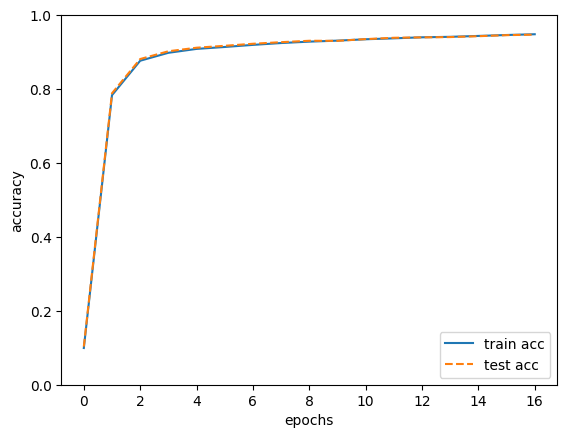

In [ ]:
# 그래프 그리기
# 훈련 데이터와 시험 데이터에 대한 정확도 추이
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

+ 훈련 데이터에 대한 정확도는 실선으로, 시험 데이터에 대한 정확도는 점선으로 그렸다.
+ 에폭이 진행될수록(학습이 진행될수록) 훈련 데이터와 시험 데이터를 사용하고 평가한 정확도가 모두 좋아졌다.
+ 두 정확도에는 차이가 없음을 알 수 있다. 즉 오버피팅이 일어나지 않았음을 의미한다.

## 4.6 정리

+ 기계학습에서 사용하는 데이터셋은훈련 데이터와 시험 데이터로 나눠 사용한다.
+ 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
+ 신경망 학습은 손실 함수를 지표로,  
손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
+ 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고,  
기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
+ 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
+ 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
+ 수치 미분을 이용한 계산은 간단한 대신 시간이 걸리지만,  
다소 복잡한 오차역전파법으로 기울기를 고속으로 구할 수 있다.